In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
a=np.load("topview_1.npy")
b=np.load("topview_2.npy")

In [90]:
def compare(a, b):
    n=min(len(a), len(b))
    maxlen=0
    num=-1
    for i in range(1, n+1, 10):
        end_shape=a[-i:]
        start_shape=b[:i]
        x, y=end_shape[0]
        w, z=start_shape[0]
        shift_x=x-w
        shift_y=y-z
        start_shape_transformed=start_shape+np.array([shift_x, shift_y])
        
        # Compute Euclidean distances
        distances=np.linalg.norm(end_shape-start_shape_transformed, axis=1)
        threshold=5
        if np.all(distances<=threshold):
            print(f"The end of array1 matches the start of array2 within a threshold of {threshold}.")
            if(i>maxlen):
                maxlen=i
                num=i
        else:
            print(f"The shapes do not match within the threshold of {threshold}.")

        # Print distances for debugging
        print("Distances:", distances)
    print("The value of num is: ", num)
    b=b[num:]
    return a, b

In [91]:
a, b=compare(a, b)

The end of array1 matches the start of array2 within a threshold of 5.
Distances: [0.]
The shapes do not match within the threshold of 5.
Distances: [ 0.          8.62215851 15.11094413 17.79516918 18.55775295 19.39201686
 18.41161506 15.89549186 15.92116381 10.03935366  7.65416736]
The shapes do not match within the threshold of 5.
Distances: [ 0.          5.2576364  13.00657607 12.20785447 13.68220211 12.69540966
 16.08077452 22.22006286 22.95389345 29.51882048 34.0338213  26.99051143
 21.19278676 12.81843954  7.87165844  3.98012125  7.25779806  7.35674981
 13.75853408 12.71566408 14.43855288]
The shapes do not match within the threshold of 5.
Distances: [ 0.          2.18323169  5.46880034  2.59547225  2.78946829  4.85074121
  7.89486139 14.99709867 16.3691313  22.06108051 27.69605555 23.83466697
 19.54159184 18.34463975 19.71421173 18.89768935 21.45711407 22.78662665
 25.54563014 29.52134258 31.25442473 30.04879792 28.20263324 26.65365439
 23.07322235 11.55737718 11.06343853  9.561

In [92]:
# Center at origin
w, z=a[0]
a=a-np.array([w, z])
p, q=b[0]
b=b-np.array([p, q])

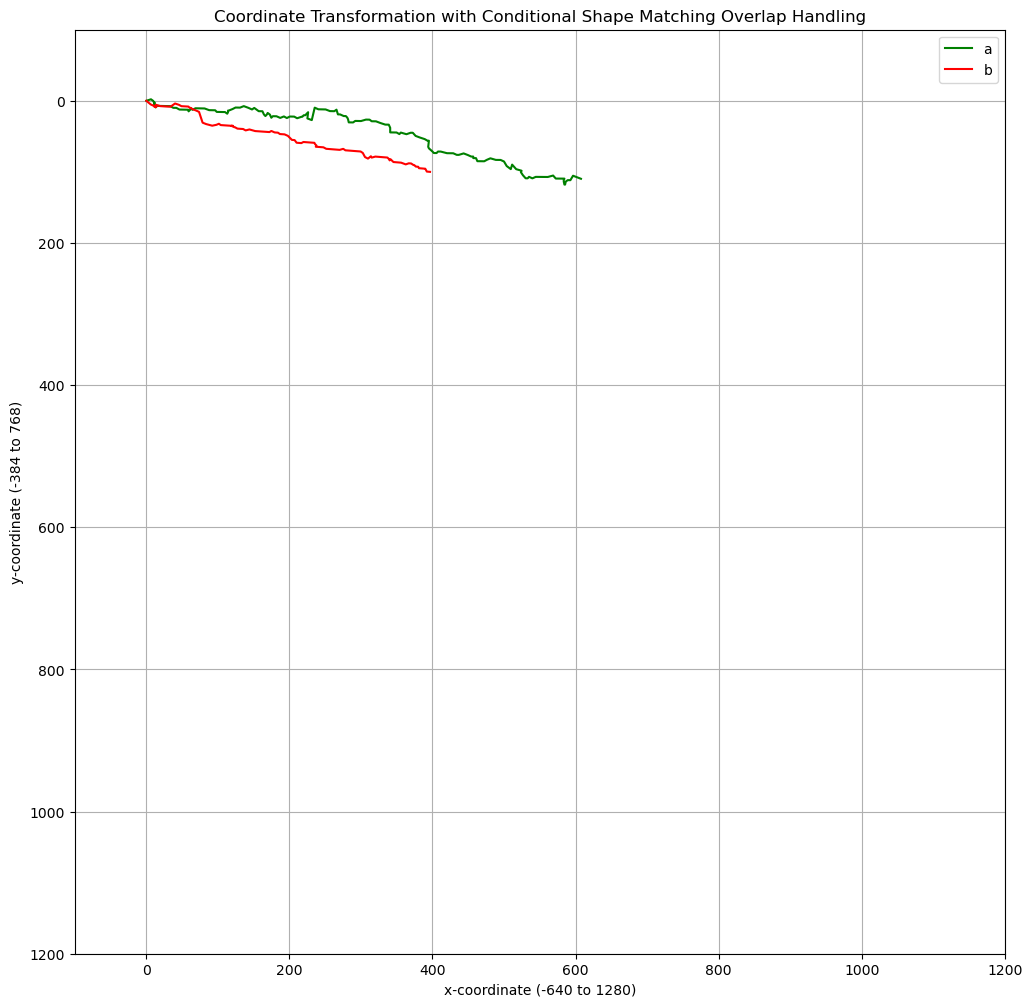

In [93]:
# Plot the arrays
plt.figure(figsize=(12, 12))
plt.plot(a[:, 0], a[:, 1], color='green', label='a')
plt.plot(b[:, 0], b[:, 1], color='red', label='b')
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.legend()
plt.title('Coordinate Transformation with Conditional Shape Matching Overlap Handling')
plt.xlabel('x-coordinate (-640 to 1280)')
plt.ylabel('y-coordinate (-384 to 768)')
plt.gca().invert_yaxis()  # Invert y-axis for portrait orientation
plt.grid(True)
plt.show()

In [94]:
def rotate_points(points, angle_deg, origin):
    angle_rad=np.deg2rad(angle_deg)
    cos_theta=np.cos(angle_rad)
    sin_theta=np.sin(angle_rad)
    
    # Rotation matrix
    rotation_matrix=np.array([
        [cos_theta, -sin_theta],
        [sin_theta, cos_theta]
    ])
    
    # Translate points to the origin (a, b)
    translated_points=points-origin
    rotated_points=np.dot(translated_points, rotation_matrix.T)
    final_points=rotated_points+origin
    
    return final_points

In [95]:
# Calculate the coordinate shift
entire_duration=11
first_feed_duration=5.5
blind_spot_duration=1.6
second_feed_duration=entire_duration-first_feed_duration-blind_spot_duration
multiplier=(blind_spot_duration/first_feed_duration)
shift_x=a[-1][0]*multiplier+a[-1][0]
shift_y=a[-1][1]*multiplier+a[-1][1]
print(shift_x, shift_y)

784.3169899667273 141.62781638636366


In [96]:
# # Apply the transformation to all points in b
b=b+np.array([shift_x, shift_y])

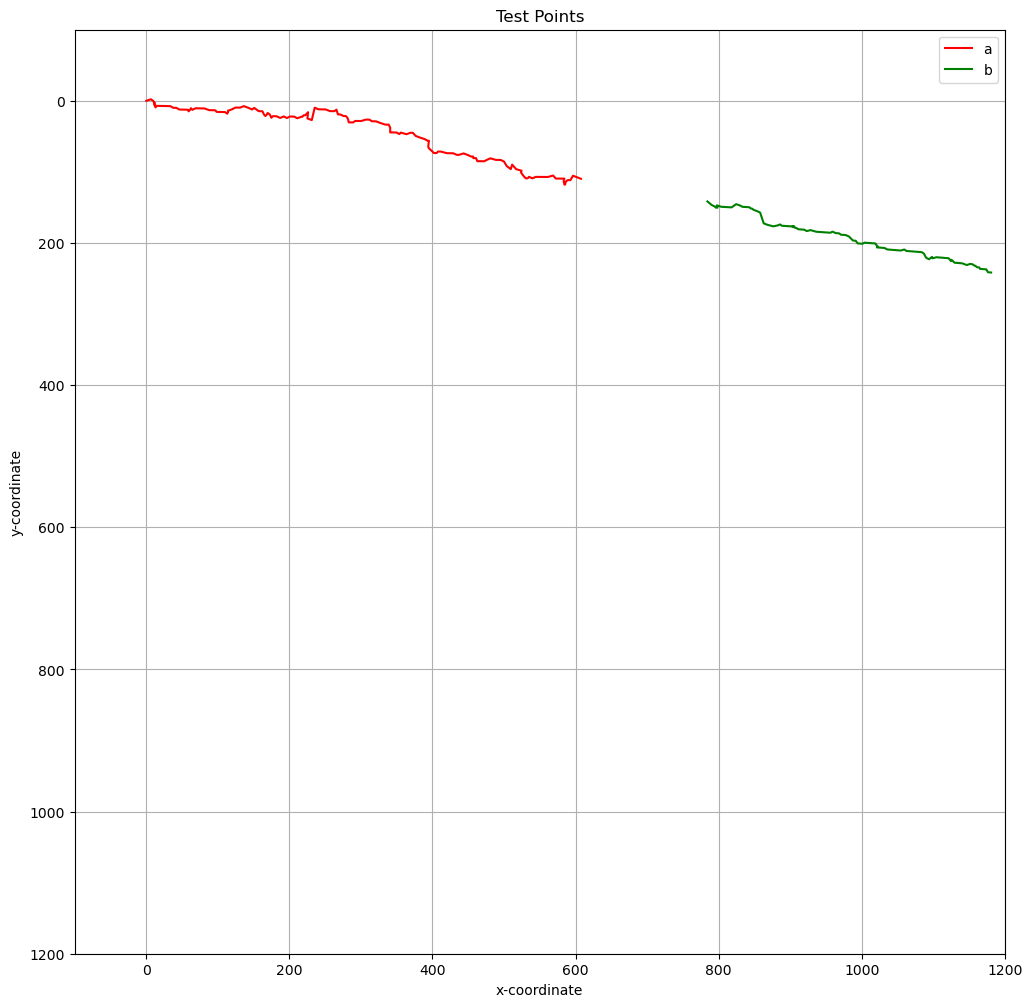

In [97]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(a[:, 0], a[:, 1], color='r', label='a')
plt.plot(b[:, 0], b[:, 1], color='g', label='b')
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.legend()
plt.title('Test Points')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

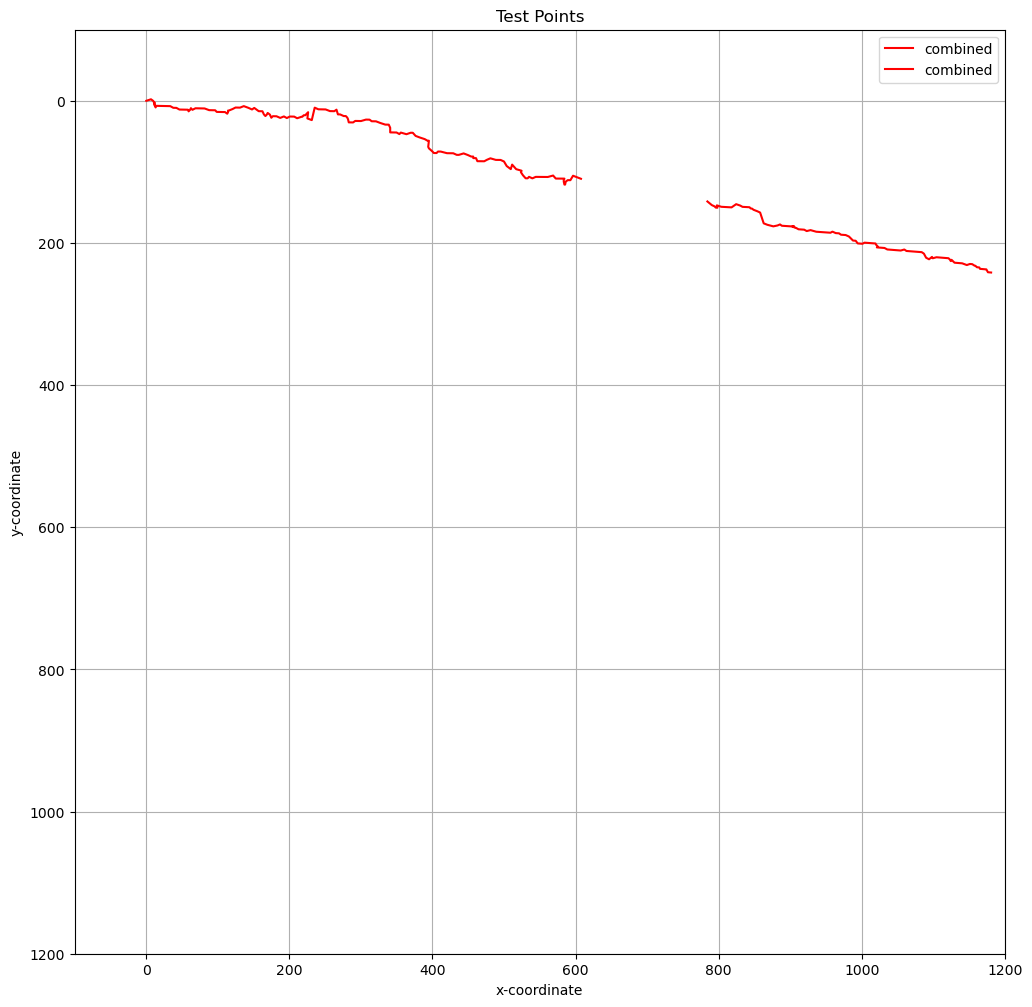

In [98]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(a[:, 0], a[:, 1], color='r', label='combined')
plt.plot(b[:, 0], b[:, 1], color='r', label='combined')
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.legend()
plt.title('Test Points')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [99]:
degree_measured=15
b=rotate_points(b, angle_deg=degree_measured, origin=np.array([[a[-1][0], a[-1][1]]]))

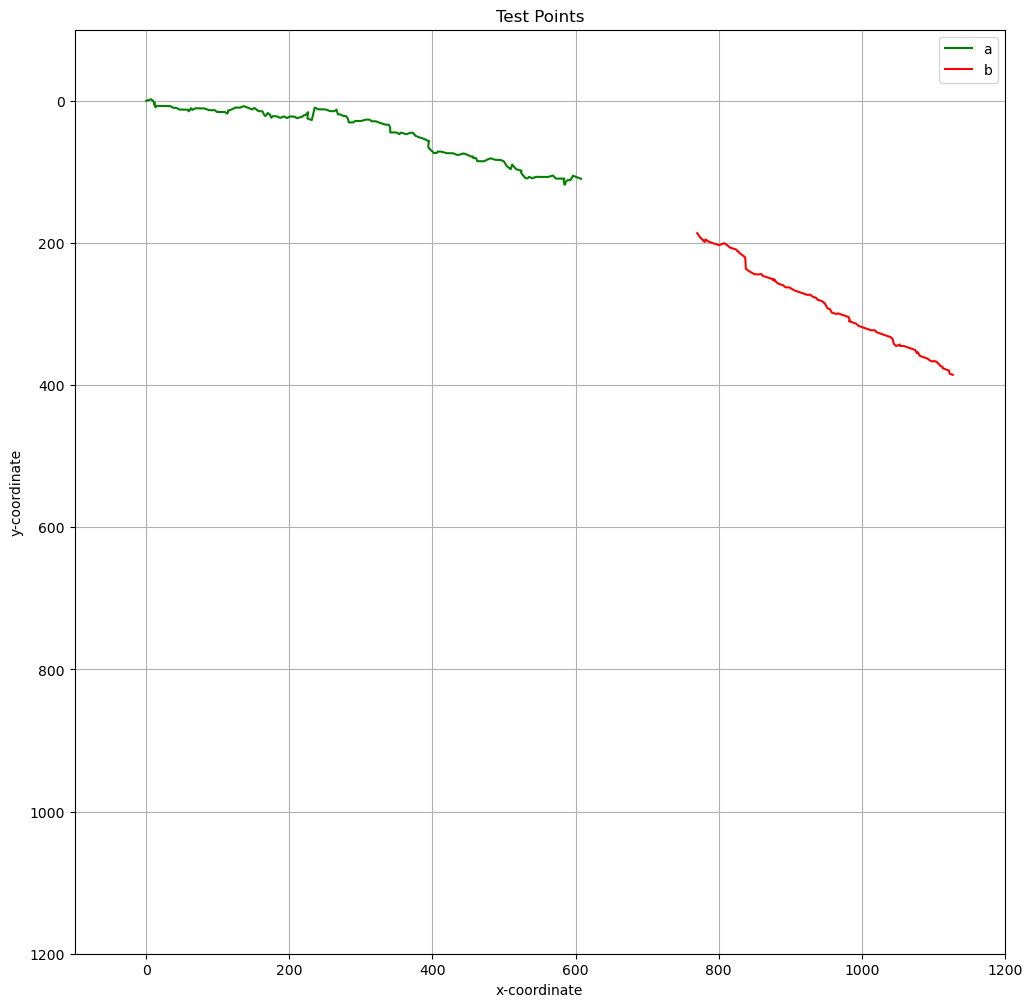

In [100]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(a[:, 0], a[:, 1], color='green', label='a')
plt.plot(b[:, 0], b[:, 1], color='red', label='b')
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.legend()
plt.title('Test Points')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [101]:
combined=np.vstack((a, b))
combined=rotate_points(combined, angle_deg=12, origin=np.array([0,0]))

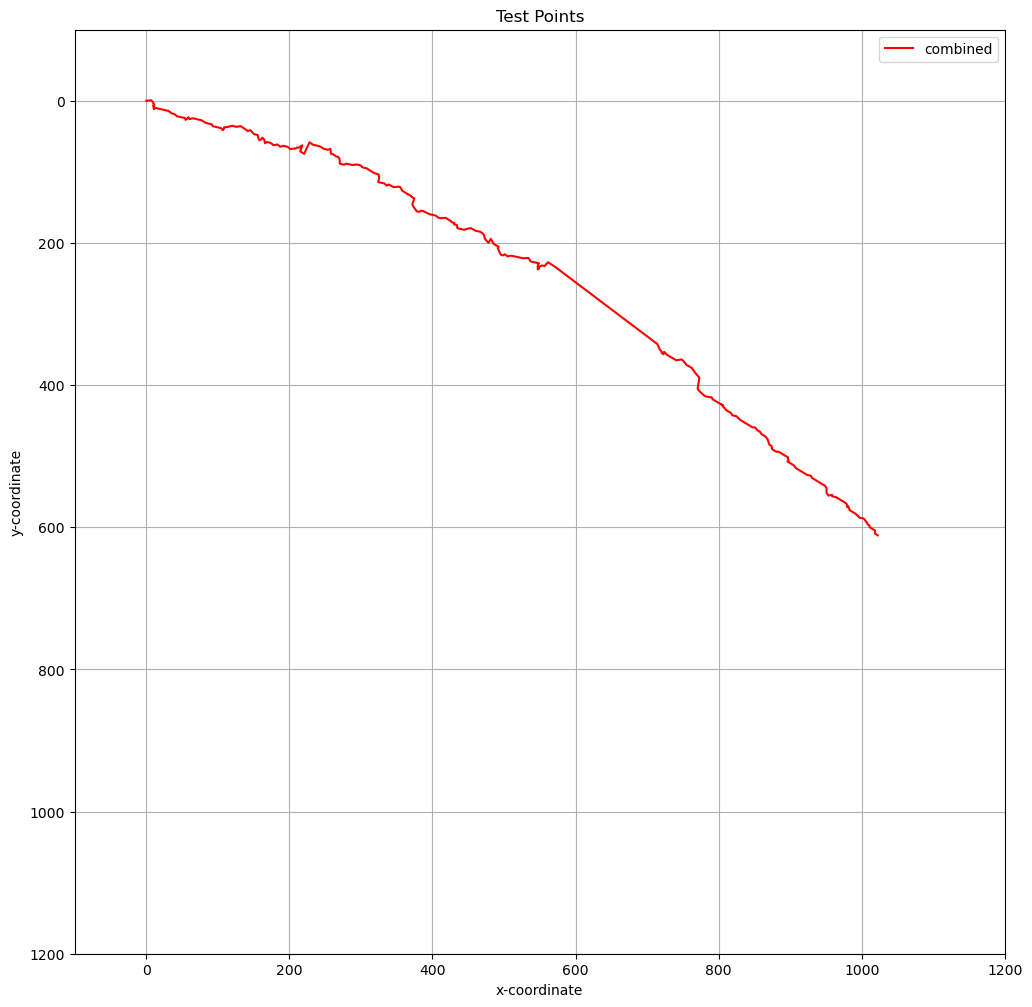

In [102]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,12))
plt.plot(combined[:, 0], combined[:, 1], color='r', label='combined')
plt.xlim(-100, 1200)
plt.ylim(-100, 1200)
plt.legend()
plt.title('Test Points')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [103]:
np.save('test_points_2.npy', combined)